In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
microsoft_df = pd.read_csv('../data/MicrosoftStock.csv')

## Understanding the Dataset

In [3]:
microsoft_df.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [4]:
microsoft_df.isnull().sum()

index     0
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [5]:
microsoft_df.duplicated().sum()

np.int64(0)

In [6]:
microsoft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


- No null and duplicates
- From info the date isn't in correct datatype if we were to use it

In [7]:
microsoft_df.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


In [8]:
print(microsoft_df['date'].min())
print(microsoft_df['date'].max())

2013-02-08
2018-02-07


So a dataset for 5 years

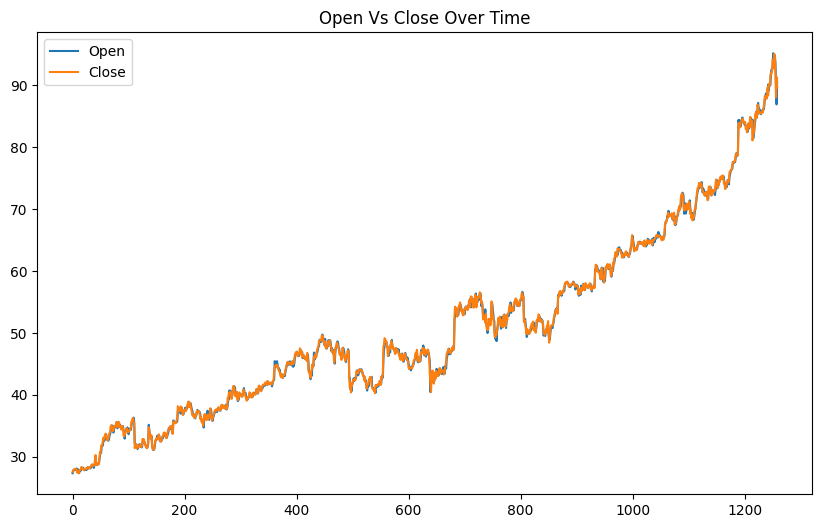

In [9]:
#Open and CLose Over Time

plt.figure(figsize=(10,6))
plt.plot(microsoft_df['open'], data=microsoft_df, label='Open')
plt.plot(microsoft_df['close'], data=microsoft_df, label='Close')

plt.title("Open Vs Close Over Time")
plt.legend()
plt.show()

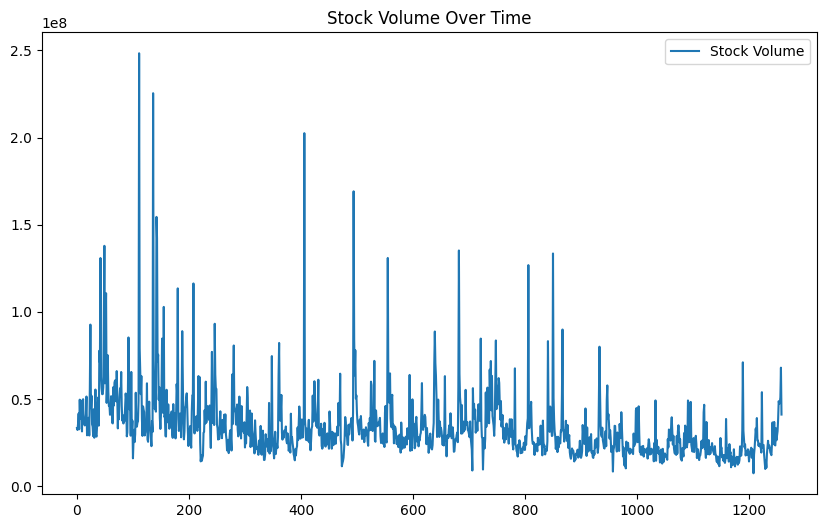

In [10]:
# Stock Volume Over Time

plt.figure(figsize=(10,6))
plt.plot(microsoft_df['volume'], data=microsoft_df, label='Stock Volume')

plt.title("Stock Volume Over Time")
plt.legend()
plt.show()

In [11]:
microsoft_df.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


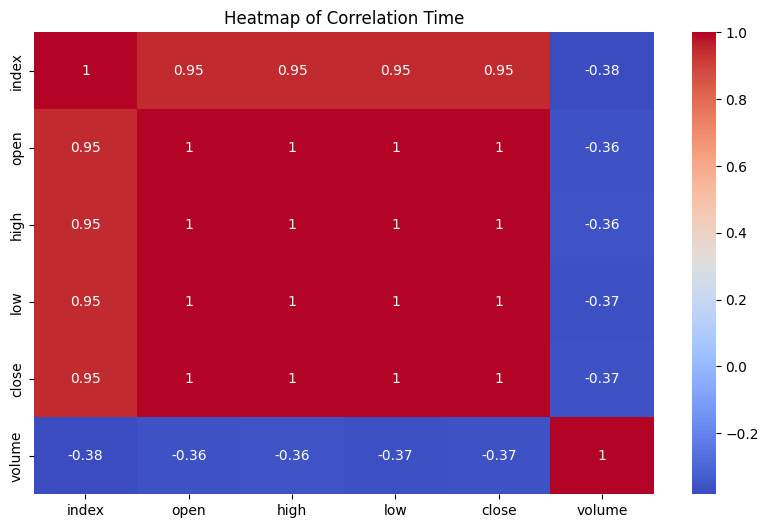

In [12]:
# Heatmap

corr = microsoft_df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title("Heatmap of Correlation Time")
plt.show()

Makes sense as open,high,love,close are highly related or dependent wheras volume is different

In [13]:
microsoft_df['date'] = pd.to_datetime(microsoft_df['date'])

In [14]:
from datetime import datetime

prediction = microsoft_df.loc[
    (microsoft_df['date'] > datetime(2014, 1, 1)) &
    (microsoft_df['date'] < datetime(2017, 12, 30))
]

In [15]:
from sklearn.preprocessing import StandardScaler

stock_close = microsoft_df.filter(["close"])        # is dataframe
dataset = stock_close.values                        # converts to narray
training_data_len = int(np.ceil(len(dataset) * 0.95))  # get 95% of data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

training_data = scaled_data[:training_data_len]     # gets 95% of data

In [16]:
from numpy.lib.stride_tricks import sliding_window_view

# Creating sliding window of 60 days
training_data_flatten = training_data.flatten()
windows = sliding_window_view(training_data_flatten, window_shape=(60,))

X_train = windows[:-1]          # all window except the target
y_train = training_data[60:]    # value right after each window

# Reshape for lstm
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [17]:
X_train.shape

(1137, 60, 1)

1137 samples with 60 days of window each and 1 featuer per timestamp

In [18]:
import os
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Supress the warning
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
timesteps = X_train.shape[1]
feature = X_train.shape[2]

model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape = (timesteps, feature)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(1))

c:\Users\Bijay\Downloads\DJANGO_PROJECTS\ML\MISSION_30\BASIC_PROJECTS\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

lstm parameter calculation = 4 * ((1 + 64) * 64 + 64) if return_seq = True
- 1 is the incoming inp feature

lstm parameter calculation = 4 * ((64 + 64) * 64 + 64) if return_seq = False
- here 64 as the 1st lstm has 64 hidden units

- return_seq = False only for the last lstm

- 4 is basically 4 gates -> forget, i/p, o/p, candidate

In [20]:
history = model.compile(optimizer='adam', loss='mae', metrics=['mse'])

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20


In [ ]:
test_data = scaled_data[training_data_len - 60:]    # so if we have 1000 rows here we would have 890 - 999
X_test, y_test = [], dataset[training_data_len:]    # [] and 950 - 999

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1 ))

In [ ]:
# Make a Prediction
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [ ]:
# Plotting data
train = microsoft_df[:training_data_len]
test =  microsoft_df[training_data_len:]

test = test.copy()

test['Predictions'] = predictions

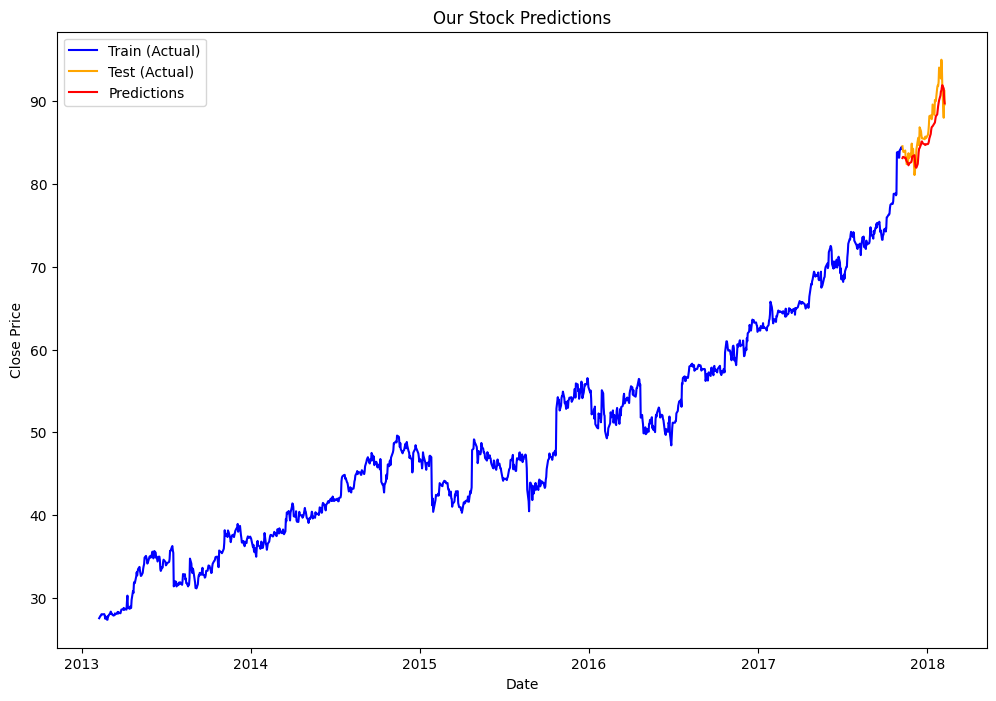

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train['date'], train['close'], label="Train (Actual)", color='blue')
plt.plot(test['date'], test['close'], label="Test (Actual)", color='orange')
plt.plot(test['date'], test['Predictions'], label="Predictions", color='red')
plt.title("Our Stock Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [ ]:
def predict_next_day(model, recent_data, window_size=60):

    # Ensure correct shape for LSTM
    X_input = np.array(recent_data[-window_size:]).reshape(1, window_size, 1)
    
    # Predict
    pred = model.predict(X_input)
    return pred[0][0]


In [ ]:
# recent_data: last 60 scaled closing prices
tomorrow_pred = predict_next_day(model, scaled_data[-60:])
print("Predicted closing for tomorrow (scaled):", tomorrow_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted closing for tomorrow (scaled): 2.5718896


In [ ]:
tomorrow_pred_actual = scaler.inverse_transform(np.array([[tomorrow_pred]]))[0][0]
print("Predicted closing for tomorrow:", tomorrow_pred_actual)

Predicted closing for tomorrow: 89.24591
